In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import numpy as np
from tensorflow.keras.models import load_model

In [5]:
Image_size = 256
Batch_size = 32
train_size = 0.8
epochs = 25
channels=3

In [6]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_desease",
    shuffle = True,
    image_size = (Image_size, Image_size),
    batch_size = Batch_size
    

)

Found 2152 files belonging to 3 classes.


In [42]:
classe_name = df.class_names
classe_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

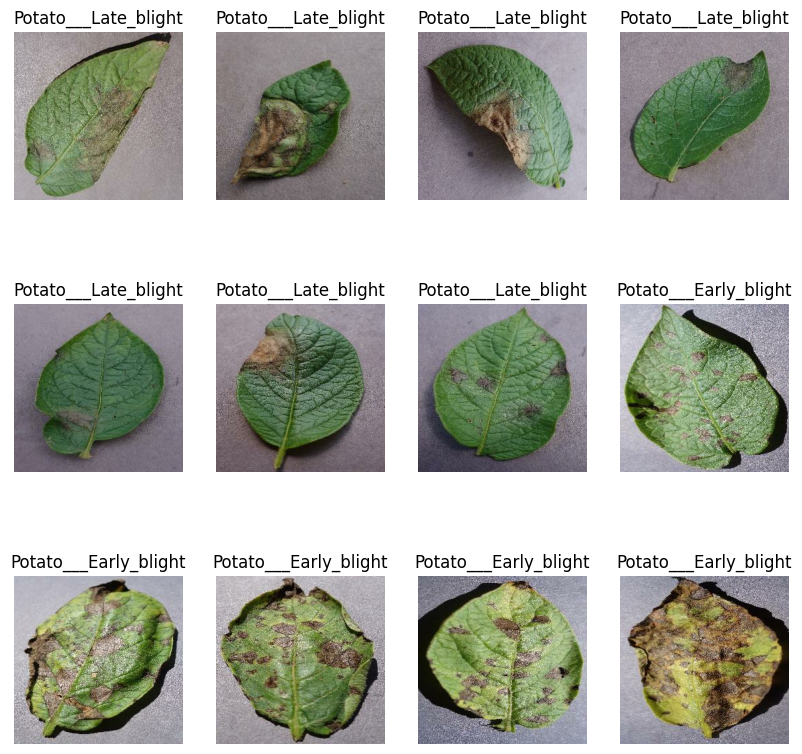

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax =plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(classe_name[label_batch[i]])
        plt.axis("off")

In [10]:
def get_dataset_partions(ds, train_set = 0.8, val_set=0.1, test_set=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
    train_size= int(ds_size*train_set)
    train_ds = ds.take(train_size)
    val_size= int( val_set*ds_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    

In [19]:
train_df, val_df, test_df = get_dataset_partions(df)

In [20]:
len(test_df)


8

In [21]:
train_df= train_df.cache().shuffle(1000)
val_df = val_df.cache().shuffle(1000)
test_df= test_df.cache().shuffle(1000)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.Rescaling(0.2)
])

In [24]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(Image_size,Image_size,channels)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.build(input_shape = (Batch_size,Image_size,Image_size, channels))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False), metrics = ['accuracy'])

In [27]:
history = model.fit(
    train_df, 
    epochs = epochs,
    batch_size= Batch_size,
    verbose = 2,
    validation_data = val_df,
    
    

)

Epoch 1/25


54/54 - 67s - loss: 0.9173 - accuracy: 0.4745 - val_loss: 0.9108 - val_accuracy: 0.3594 - 67s/epoch - 1s/step
Epoch 2/25
54/54 - 62s - loss: 0.8156 - accuracy: 0.5868 - val_loss: 0.7853 - val_accuracy: 0.6250 - 62s/epoch - 1s/step
Epoch 3/25
54/54 - 61s - loss: 0.6411 - accuracy: 0.7442 - val_loss: 0.5838 - val_accuracy: 0.7344 - 61s/epoch - 1s/step
Epoch 4/25
54/54 - 59s - loss: 0.4777 - accuracy: 0.8189 - val_loss: 0.5843 - val_accuracy: 0.8177 - 59s/epoch - 1s/step
Epoch 5/25
54/54 - 59s - loss: 0.4177 - accuracy: 0.8351 - val_loss: 0.3411 - val_accuracy: 0.8594 - 59s/epoch - 1s/step
Epoch 6/25
54/54 - 58s - loss: 0.3591 - accuracy: 0.8594 - val_loss: 0.5571 - val_accuracy: 0.7917 - 58s/epoch - 1s/step
Epoch 7/25
54/54 - 58s - loss: 0.3758 - accuracy: 0.8617 - val_loss: 0.2737 - val_accuracy: 0.9167 - 58s/epoch - 1s/step
Epoch 8/25
54/54 - 59s - loss: 0.3062 - accuracy: 0.8837 - val_loss: 0.2305 - val_accuracy: 0.9167 - 59s/epoch - 1s/step
Epoch 9/25
54/54 - 59s - loss:

In [28]:
scores = model.evaluate(test_df)

8/8 [==============================] - 3s 228ms/step - loss: 0.0763 - accuracy: 0.9766


In [29]:
scores

[0.07628381997346878, 0.9765625]

In [63]:
model_version=1
model.save(f'model/{model_version}')

INFO:tensorflow:Assets written to: model/1\assets


INFO:tensorflow:Assets written to: model/1\assets


In [31]:
acc =history.history["accuracy"]
val_acc = history.history['val_accuracy']

Loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

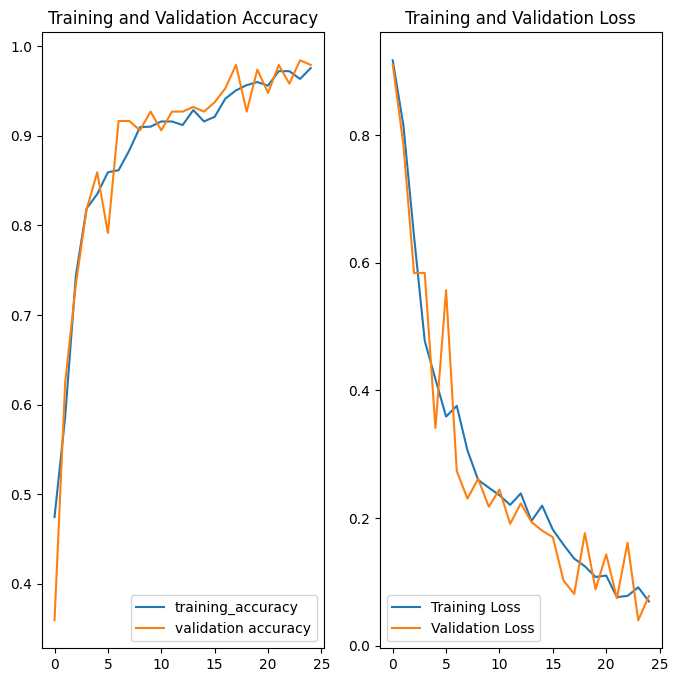

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label= 'training_accuracy')
plt.plot(range(epochs), val_acc, label='validation accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)

plt.plot(range(epochs), Loss, label= 'Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc= 'lower left')
plt.title('Training and Validation Loss')



In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    predict_class= classe_name[np.argmax(prediction[0])]
    confidence= round(100*(np.argmax(prediction[0])), 2)
    return predict_class, confidence
                    
    

1/1 [==============================] - 0s 27ms/step


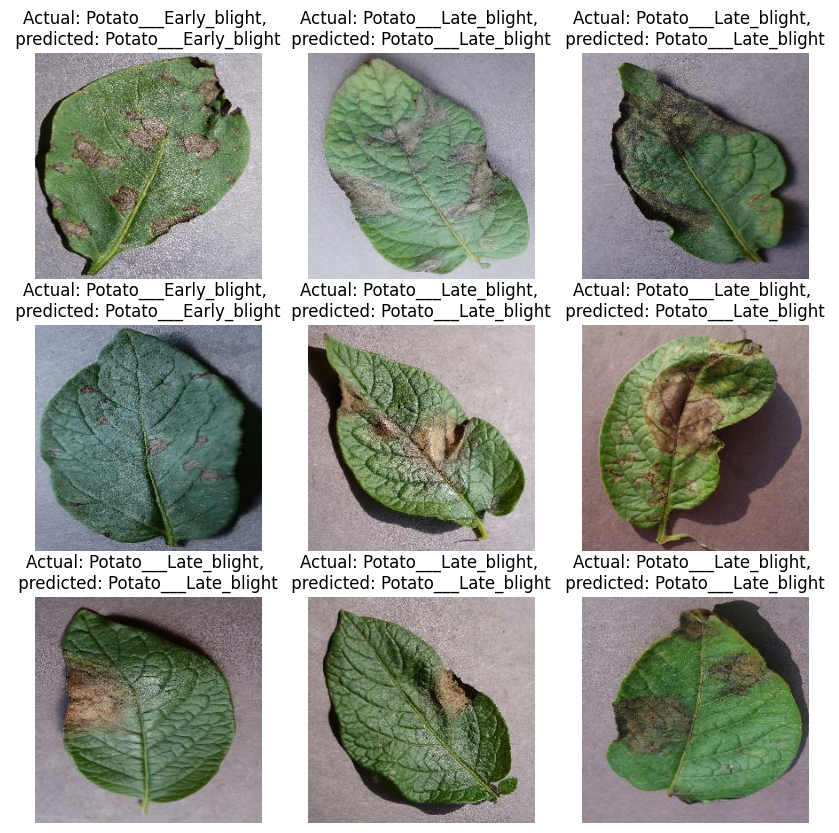

In [60]:
plt.figure(figsize=(10,10))
for image, label in test_df.take(1):
    for i in range (9):
        ax= plt.subplot(3,3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, image[i].numpy())
        actual_class = classe_name[label[i]]

        plt.title(f'Actual: {actual_class}, \n predicted: {predicted_class} ')
        
        plt.axis('off')

        
        
        
        
        
        
        